# TELL Analysis of 2010 Heat Wave

This notebook processes and makes plots of the temporal evolution of load during the course of the 2010 heat wave in the U.S.

In [1]:
# Start by importing required packages and information about your operating system:
import os 
import datetime

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from glob import glob
from datetime import timedelta


## Set the Directory Structure

In [3]:
# Identify the top-level data input and output directories:
tell_data_input_dir =  '/Users/burl878/Documents/Code/code_repos/ntp_heat_wave/data/tell_data/'
image_output_dir =  '/Users/burl878/Documents/Code/code_repos/ntp_heat_wave/plots'

# If the "image_output_dir" subdirectory doesn't exist then create it:
if not os.path.exists(image_output_dir):
   os.makedirs(image_output_dir)


## Set the Balancing Authority and Scenario You Want to Plot

In [32]:
# Give the abbreviation for the BA you want to analyze:
ba_to_plot = 'PSCO'

# Set the scenario you want to analyze:
scenario = 'with_population_effects'


## Process the Load Data for Time Series Plotting

In [33]:
# Read in the historical load data:
if scenario == 'with_population_effects': 
   hist_df = pd.read_csv((tell_data_input_dir + 'with_population_effects/' + 'BA_Loads_2010_With_Population_Effects.csv'))
   fut_df = pd.read_csv((tell_data_input_dir + 'with_population_effects/' + 'BA_Loads_2050_With_Population_Effects.csv'))
else:
   hist_df = pd.read_csv((tell_data_input_dir + 'without_population_effects/' + 'BA_Loads_2010_Without_Population_Effects.csv'))
   fut_df = pd.read_csv((tell_data_input_dir + 'without_population_effects/' + 'BA_Loads_2050_Without_Population_Effects.csv'))
    
hist_df = hist_df.loc[hist_df['BA'].isin([ba_to_plot])].copy()
hist_df['Year'] = pd.DatetimeIndex(hist_df['Time_UTC']).year
hist_df['Month'] = pd.DatetimeIndex(hist_df['Time_UTC']).month
hist_df['Day'] = pd.DatetimeIndex(hist_df['Time_UTC']).day
hist_df['Hour'] = pd.DatetimeIndex(hist_df['Time_UTC']).hour

fut_df = fut_df.loc[fut_df['BA'].isin([ba_to_plot])].copy()
fut_df['Year'] = pd.DatetimeIndex(fut_df['Time_UTC']).year
fut_df['Month'] = pd.DatetimeIndex(fut_df['Time_UTC']).month
fut_df['Day'] = pd.DatetimeIndex(fut_df['Time_UTC']).day
fut_df['Hour'] = pd.DatetimeIndex(fut_df['Time_UTC']).hour
    
plot_df = pd.merge(hist_df, fut_df, how='left', on=['BA', 'Month', 'Day', 'Hour'])
plot_df['date'] = plot_df[["Year_x","Month","Day","Hour"]].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
plot_df['Time_UTC'] = pd.to_datetime(plot_df['date'], format='%Y-%m-%d-%H')

# Compute the normalized loads:
plot_df['rcp45cooler_ssp3_norm'] = 100 * (plot_df['rcp45cooler_ssp3'].div(plot_df['historic']) - 1)
plot_df['rcp45cooler_ssp5_norm'] = 100 * (plot_df['rcp45cooler_ssp5'].div(plot_df['historic']) - 1)
plot_df['rcp45hotter_ssp3_norm'] = 100 * (plot_df['rcp45hotter_ssp3'].div(plot_df['historic']) - 1)
plot_df['rcp45hotter_ssp5_norm'] = 100 * (plot_df['rcp45hotter_ssp5'].div(plot_df['historic']) - 1)
plot_df['rcp85cooler_ssp3_norm'] = 100 * (plot_df['rcp85cooler_ssp3'].div(plot_df['historic']) - 1)
plot_df['rcp85cooler_ssp5_norm'] = 100 * (plot_df['rcp85cooler_ssp5'].div(plot_df['historic']) - 1)
plot_df['rcp85hotter_ssp3_norm'] = 100 * (plot_df['rcp85hotter_ssp3'].div(plot_df['historic']) - 1)
plot_df['rcp85hotter_ssp5_norm'] = 100 * (plot_df['rcp85hotter_ssp5'].div(plot_df['historic']) - 1)

# Only keep the columns that are needed:
plot_df = plot_df[['Time_UTC', 'historic', 
                   'rcp45cooler_ssp3', 'rcp45cooler_ssp3_norm', 
                   'rcp45cooler_ssp5', 'rcp45cooler_ssp5_norm',
                   'rcp45hotter_ssp3', 'rcp45hotter_ssp3_norm',
                   'rcp45hotter_ssp5', 'rcp45hotter_ssp5_norm',
                   'rcp85cooler_ssp3', 'rcp85cooler_ssp3_norm', 
                   'rcp85cooler_ssp5', 'rcp85cooler_ssp5_norm',
                   'rcp85hotter_ssp3', 'rcp85hotter_ssp3_norm',
                   'rcp85hotter_ssp5', 'rcp85hotter_ssp5_norm']].copy()

# Compute the date of the peak historical load:
peak_day = plot_df['Time_UTC'].loc[plot_df['historic'].idxmax()] 
min_date = pd.to_datetime(peak_day) - timedelta(days=3.5)
max_date = pd.to_datetime(peak_day) + timedelta(days=3.5)

# Compute the annual minimum and maximum loads:
min_load = 0.95*plot_df['historic'].min()
max_load = 1.05*plot_df['historic'].max()

# Return the dataframe:
plot_df


,Time_UTC,historic,rcp45cooler_ssp3,rcp45cooler_ssp3_norm,rcp45cooler_ssp5,rcp45cooler_ssp5_norm,rcp45hotter_ssp3,rcp45hotter_ssp3_norm,rcp45hotter_ssp5,rcp45hotter_ssp5_norm,rcp85cooler_ssp3,rcp85cooler_ssp3_norm,rcp85cooler_ssp5,rcp85cooler_ssp5_norm,rcp85hotter_ssp3,rcp85hotter_ssp3_norm,rcp85hotter_ssp5,rcp85hotter_ssp5_norm
0,2010-01-01 00:00:00,5384.95,6599.78,22.559727,8685.51,61.292305,6505.58,20.810407,8563.96,59.035089,6937.30,28.827566,8609.01,59.871679,6832.78,26.886601,8497.33,57.797751
1,2010-01-01 01:00:00,5589.80,6876.99,23.027479,9048.12,61.868403,6803.44,21.711689,8961.83,60.324699,7243.00,29.575298,8990.03,60.829189,7130.57,27.563956,8870.98,58.699417
2,2010-01-01 02:00:00,5744.72,7089.19,23.403578,9329.52,62.401649,7027.63,22.331985,9259.81,61.188187,7466.95,29.979355,9272.76,61.413611,7358.40,28.089794,9157.21,59.402199
3,2010-01-01 03:00:00,5562.66,7068.73,27.074637,9315.74,67.469160,7011.89,26.052824,9250.32,66.293104,7428.68,33.545462,9236.13,66.038011,7321.73,31.622821,9119.47,63.940812
4,2010-01-01 04:00:00,5351.77,6839.80,27.804446,9015.16,68.451933,6775.94,26.611196,8938.25,67.014838,7196.02,34.460562,8949.12,67.217948,7092.19,32.520456,8836.27,65.109300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2010-12-31 19:00:00,5822.54,7339.82,26.058730,9686.28,66.358325,7294.27,25.276426,9639.99,65.563311,7748.33,33.074741,9651.08,65.753778,7665.20,31.647013,9564.89,64.273496
8756,2010-12-31 20:00:00,5759.35,7298.75,26.728711,9624.80,67.116081,7248.48,25.855869,9570.87,66.179690,7718.16,34.010956,9605.82,66.786530,7615.68,32.231589,9494.17,64.847943
8757,2010-12-31 21:00:00,5687.24,7227.46,27.082029,9521.78,67.423566,7186.13,26.355315,9480.45,66.696851,7653.74,34.577405,9520.69,67.404400,7546.50,32.691780,9402.13,65.319733
8758,2010-12-31 22:00:00,5623.65,7166.89,27.441964,9436.19,67.794760,7140.36,26.970206,9417.39,67.460457,7593.54,35.028674,9440.94,67.879224,7496.28,33.299192,9335.88,66.011043


## Make the Time Series Plots

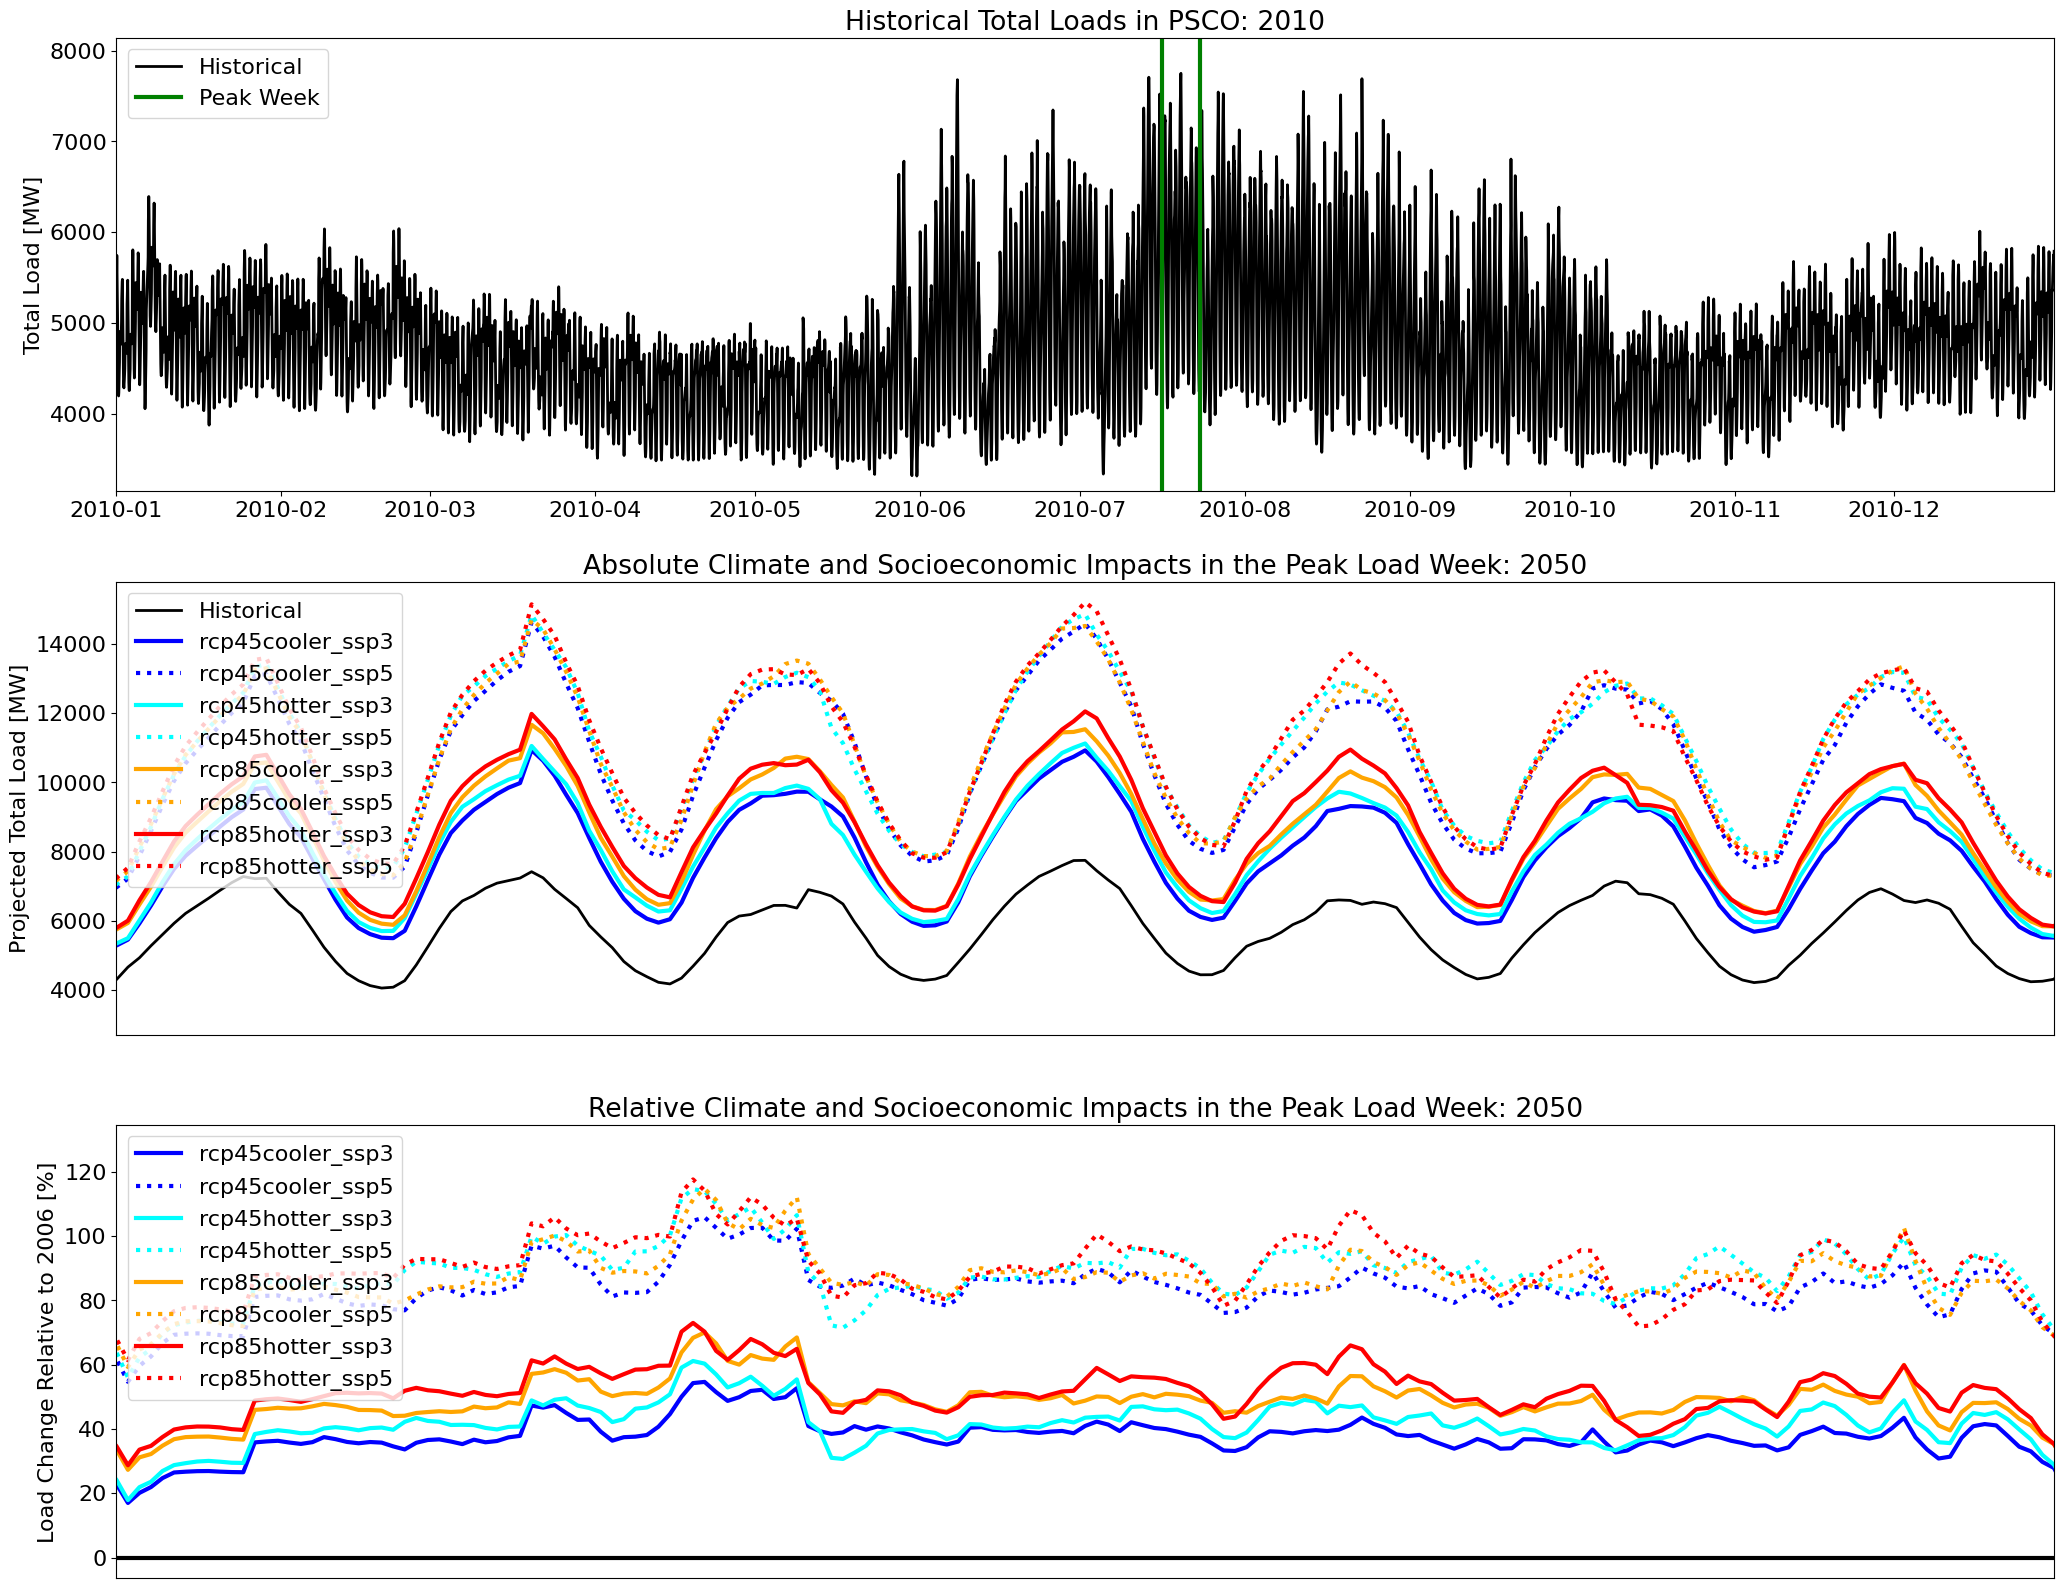

In [34]:
# Make the plot:
plt.figure(figsize=(25, 20))
plt.rcParams['font.size'] = 16
plt.subplot(3,1,1)
plt.plot(plot_df['Time_UTC'], plot_df['historic'], color='k', linestyle='-', label='Historical', linewidth=2)
plt.plot([min_date, min_date], [min_load, max_load], color='g', linestyle='-', label='Peak Week', linewidth=3)
plt.plot([max_date, max_date], [min_load, max_load], color='g', linestyle='-', linewidth=3)
plt.ylim([min_load, max_load])
plt.xlim([datetime.date(2010, 1, 1), datetime.date(2010, 12, 31)])
plt.legend(loc='upper left')
plt.xlabel('')
plt.ylabel('Total Load [MW]')
plt.title(('Historical Total Loads in ' + ba_to_plot + ': 2010'))

plt.subplot(3,1,2)
plt.plot(plot_df['Time_UTC'], plot_df['historic'], color='k', linestyle='-', label='Historical', linewidth=2)
if scenario == 'with_population_effects':
   plt.plot(plot_df['Time_UTC'], plot_df['rcp45cooler_ssp3'], color='b', linestyle='-', label='rcp45cooler_ssp3', linewidth=3)
   plt.plot(plot_df['Time_UTC'], plot_df['rcp45cooler_ssp5'], color='b', linestyle=':', label='rcp45cooler_ssp5', linewidth=3)
   plt.plot(plot_df['Time_UTC'], plot_df['rcp45hotter_ssp3'], color='cyan', linestyle='-', label='rcp45hotter_ssp3', linewidth=3)
   plt.plot(plot_df['Time_UTC'], plot_df['rcp45hotter_ssp5'], color='cyan', linestyle=':', label='rcp45hotter_ssp5', linewidth=3)
   plt.plot(plot_df['Time_UTC'], plot_df['rcp85cooler_ssp3'], color='orange', linestyle='-', label='rcp85cooler_ssp3', linewidth=3)
   plt.plot(plot_df['Time_UTC'], plot_df['rcp85cooler_ssp5'], color='orange', linestyle=':', label='rcp85cooler_ssp5', linewidth=3)
   plt.plot(plot_df['Time_UTC'], plot_df['rcp85hotter_ssp3'], color='red', linestyle='-', label='rcp85hotter_ssp3', linewidth=3)
   plt.plot(plot_df['Time_UTC'], plot_df['rcp85hotter_ssp5'], color='red', linestyle=':', label='rcp85hotter_ssp5', linewidth=3)
else:
   plt.plot(plot_df['Time_UTC'], plot_df['rcp45cooler_ssp3'], color='b', linestyle='-', label='rcp45cooler_ssp3', linewidth=3)
   plt.plot(plot_df['Time_UTC'], plot_df['rcp45hotter_ssp3'], color='cyan', linestyle='-', label='rcp45hotter_ssp3', linewidth=3)
   plt.plot(plot_df['Time_UTC'], plot_df['rcp85cooler_ssp3'], color='orange', linestyle='-', label='rcp85cooler_ssp3', linewidth=3)
   plt.plot(plot_df['Time_UTC'], plot_df['rcp85hotter_ssp3'], color='red', linestyle='-', label='rcp85hotter_ssp3', linewidth=3)
plt.xlim([min_date, max_date])
plt.legend(loc='upper left')
plt.xticks([])
plt.xlabel('')
plt.ylabel('Projected Total Load [MW]')
if scenario == 'with_population_effects':
   plt.title(('Absolute Climate and Socioeconomic Impacts in the Peak Load Week: 2050'))
else:
   plt.title(('Absolute Climate Only Impacts in the Peak Load Week: 2050'))

plt.subplot(3,1,3)
if scenario == 'with_population_effects':
   plt.plot(plot_df['Time_UTC'], plot_df['rcp45cooler_ssp3_norm'], color='b', linestyle='-', label='rcp45cooler_ssp3', linewidth=3)
   plt.plot(plot_df['Time_UTC'], plot_df['rcp45cooler_ssp5_norm'], color='b', linestyle=':', label='rcp45cooler_ssp5', linewidth=3)
   plt.plot(plot_df['Time_UTC'], plot_df['rcp45hotter_ssp3_norm'], color='cyan', linestyle='-', label='rcp45hotter_ssp3', linewidth=3)
   plt.plot(plot_df['Time_UTC'], plot_df['rcp45hotter_ssp5_norm'], color='cyan', linestyle=':', label='rcp45hotter_ssp5', linewidth=3)
   plt.plot(plot_df['Time_UTC'], plot_df['rcp85cooler_ssp3_norm'], color='orange', linestyle='-', label='rcp85cooler_ssp3', linewidth=3)
   plt.plot(plot_df['Time_UTC'], plot_df['rcp85cooler_ssp5_norm'], color='orange', linestyle=':', label='rcp85cooler_ssp5', linewidth=3)
   plt.plot(plot_df['Time_UTC'], plot_df['rcp85hotter_ssp3_norm'], color='red', linestyle='-', label='rcp85hotter_ssp3', linewidth=3)
   plt.plot(plot_df['Time_UTC'], plot_df['rcp85hotter_ssp5_norm'], color='red', linestyle=':', label='rcp85hotter_ssp5', linewidth=3)
else:
   plt.plot(plot_df['Time_UTC'], plot_df['rcp45cooler_ssp3_norm'], color='b', linestyle='-', label='rcp45cooler_ssp3', linewidth=3)
   plt.plot(plot_df['Time_UTC'], plot_df['rcp45hotter_ssp3_norm'], color='cyan', linestyle='-', label='rcp45hotter_ssp3', linewidth=3)
   plt.plot(plot_df['Time_UTC'], plot_df['rcp85cooler_ssp3_norm'], color='orange', linestyle='-', label='rcp85cooler_ssp3', linewidth=3)
   plt.plot(plot_df['Time_UTC'], plot_df['rcp85hotter_ssp3_norm'], color='red', linestyle='-', label='rcp85hotter_ssp3', linewidth=3)
plt.plot([min_date, max_date], [0, 0], color='k', linestyle='-', linewidth=3)
plt.xlim([min_date, max_date])
plt.legend(loc='upper left')
plt.xticks([])
plt.xlabel('')
plt.ylabel('Load Change Relative to 2006 [%]')
if scenario == 'with_population_effects':
   plt.title(('Relative Climate and Socioeconomic Impacts in the Peak Load Week: 2050'))
else:
   plt.title(('Relative Climate Only Impacts in the Peak Load Week: 2050'))

if scenario == 'with_population_effects':
   filename = ('2010_heatwave_' + ba_to_plot + '_with_population_effects.png')
else:
   filename = ('2010_heatwave_' + ba_to_plot + '_without_population_effects.png')

plt.savefig(os.path.join(image_output_dir, filename), dpi=300, bbox_inches='tight', facecolor='white')


## Process the Load Data for BA Histogram Plots

In [68]:
# Set the scenario you want to analyze:
scenario_to_analze = 'rcp85hotter_ssp5'


In [69]:
# Read in the historical load data with population effects:
hist_with_df = pd.read_csv((tell_data_input_dir + 'with_population_effects/' + 'BA_Loads_2010_With_Population_Effects.csv'))
hist_with_df.rename(columns={'historic': 'historic_with_pop'}, inplace=True)
hist_with_df['Year'] = pd.DatetimeIndex(hist_with_df['Time_UTC']).year
hist_with_df['Month'] = pd.DatetimeIndex(hist_with_df['Time_UTC']).month
hist_with_df['Day'] = pd.DatetimeIndex(hist_with_df['Time_UTC']).day
hist_with_df['Hour'] = pd.DatetimeIndex(hist_with_df['Time_UTC']).hour

# Read in the projected load data with population effects:
fut_with_df = pd.read_csv((tell_data_input_dir + 'with_population_effects/' + 'BA_Loads_2050_With_Population_Effects.csv'))
fut_with_df = fut_with_df[['BA', 'Time_UTC', scenario_to_analze]].copy()
fut_with_df.rename(columns={scenario_to_analze: 'future_with_pop'}, inplace=True)
fut_with_df['Year'] = pd.DatetimeIndex(fut_with_df['Time_UTC']).year
fut_with_df['Month'] = pd.DatetimeIndex(fut_with_df['Time_UTC']).month
fut_with_df['Day'] = pd.DatetimeIndex(fut_with_df['Time_UTC']).day
fut_with_df['Hour'] = pd.DatetimeIndex(fut_with_df['Time_UTC']).hour
    
# Read in the historical load data without population effects:
hist_without_df = pd.read_csv((tell_data_input_dir + 'without_population_effects/' + 'BA_Loads_2010_Without_Population_Effects.csv'))
hist_without_df.rename(columns={'historic': 'historic_without_pop'}, inplace=True)
hist_without_df['Year'] = pd.DatetimeIndex(hist_without_df['Time_UTC']).year
hist_without_df['Month'] = pd.DatetimeIndex(hist_without_df['Time_UTC']).month
hist_without_df['Day'] = pd.DatetimeIndex(hist_without_df['Time_UTC']).day
hist_without_df['Hour'] = pd.DatetimeIndex(hist_without_df['Time_UTC']).hour

# Read in the projected load data without population effects:
fut_without_df = pd.read_csv((tell_data_input_dir + 'without_population_effects/' + 'BA_Loads_2050_Without_Population_Effects.csv'))
fut_without_df = fut_without_df[['BA', 'Time_UTC', scenario_to_analze]].copy()
fut_without_df.rename(columns={scenario_to_analze: 'future_without_pop'}, inplace=True)
fut_without_df['Year'] = pd.DatetimeIndex(fut_without_df['Time_UTC']).year
fut_without_df['Month'] = pd.DatetimeIndex(fut_without_df['Time_UTC']).month
fut_without_df['Day'] = pd.DatetimeIndex(fut_without_df['Time_UTC']).day
fut_without_df['Hour'] = pd.DatetimeIndex(fut_without_df['Time_UTC']).hour

# Merge the datasets together based on common BA, year, month, day, and hour combinations:
analysis_df = pd.merge(hist_with_df, fut_with_df, how='left', on=['BA', 'Month', 'Day', 'Hour'])
analysis_df = analysis_df[['BA', 'Year_x', 'Month', 'Day', 'Hour', 'historic_with_pop', 'future_with_pop']].copy()
analysis_df = pd.merge(analysis_df, hist_without_df, how='left', on=['BA', 'Month', 'Day', 'Hour'])
analysis_df = analysis_df[['BA', 'Year_x', 'Month', 'Day', 'Hour', 'historic_with_pop', 'future_with_pop', 'historic_without_pop']].copy()
analysis_df = pd.merge(analysis_df, fut_without_df, how='left', on=['BA', 'Month', 'Day', 'Hour'])
analysis_df = analysis_df[['BA', 'Year_x', 'Month', 'Day', 'Hour', 'historic_with_pop', 'future_with_pop', 'historic_without_pop', 'future_without_pop']].copy()

# Convert the time to a datetime variable:
analysis_df['date'] = analysis_df[['Year_x', 'Month', 'Day', 'Hour']].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
analysis_df['Time_UTC'] = pd.to_datetime(analysis_df['date'], format='%Y-%m-%d-%H')

# Compute the normalized loads:
analysis_df['norm_with_pop'] = 100 * (analysis_df['future_with_pop'].div(analysis_df['historic_with_pop']) - 1)
analysis_df['norm_without_pop'] = 100 * (analysis_df['future_without_pop'].div(analysis_df['historic_without_pop']) - 1)

# Only keep the columns that are needed:
analysis_df = analysis_df[['BA', 'Time_UTC', 
                           'historic_with_pop', 'future_with_pop', 'norm_with_pop',
                           'historic_without_pop', 'future_without_pop', 'norm_without_pop']].copy()

# Return the dataframe
analysis_df


,BA,Time_UTC,historic_with_pop,future_with_pop,norm_with_pop,historic_without_pop,future_without_pop,norm_without_pop
0,AEC,2010-01-01 00:00:00,480.52,707.63,47.263381,460.09,484.15,5.229412
1,AEC,2010-01-01 01:00:00,510.84,761.16,49.001644,489.12,520.78,6.472849
2,AEC,2010-01-01 02:00:00,517.77,780.24,50.692392,495.76,533.83,7.679119
3,AEC,2010-01-01 03:00:00,490.18,759.76,54.996124,469.34,519.82,10.755529
4,AEC,2010-01-01 04:00:00,467.44,731.58,56.507787,447.57,500.54,11.835020
...,...,...,...,...,...,...,...,...
473035,WAUW,2010-12-31 19:00:00,113.62,154.85,36.287625,120.78,119.78,-0.827952
473036,WAUW,2010-12-31 20:00:00,113.24,154.22,36.188626,120.37,119.29,-0.897234
473037,WAUW,2010-12-31 21:00:00,112.11,152.90,36.383909,119.17,118.27,-0.755224
473038,WAUW,2010-12-31 22:00:00,110.90,151.76,36.844004,117.89,117.39,-0.424124


In [70]:
# Make a list of all of the BAs in the "analysis_df":
bas = analysis_df['BA'].unique()

# Create an empty dataframe and store the results:
ba_df = pd.DataFrame()
    
# Loop over the BAs and compute their mean effects:
for i in range(len(bas)):
    # Subset to just the data for the BA being processed:
    subset_df = analysis_df[analysis_df['BA'].isin([bas[i]])].copy()
    
    # Compute the date of the peak historical load:
    peak_day = subset_df['Time_UTC'].loc[subset_df['historic_with_pop'].idxmax()] 
    min_date = pd.to_datetime(peak_day) - timedelta(days=3.5)
    max_date = pd.to_datetime(peak_day) + timedelta(days=3.5)
    
    # Subset to only the week around the historical peak load value:
    peak_df = subset_df.loc[(subset_df['Time_UTC'] >= min_date) & (subset_df['Time_UTC'] < max_date)]
    
    # Output the mean difference:
    ba_df.loc[i, 'BA'] = bas[i]
    ba_df.loc[i, 'Mean_With_Pop'] = subset_df['norm_with_pop'].mean().round(2)
    ba_df.loc[i, 'Max_With_Pop'] = subset_df['norm_with_pop'].max().round(2)
    ba_df.loc[i, 'Peak_With_Pop'] = peak_df['norm_with_pop'].mean().round(2)
    ba_df.loc[i, 'Mean_Without_Pop'] = subset_df['norm_without_pop'].mean().round(2)
    ba_df.loc[i, 'Max_Without_Pop'] = subset_df['norm_without_pop'].max().round(2)
    ba_df.loc[i, 'Peak_Without_Pop'] = peak_df['norm_without_pop'].mean().round(2)

# Subset the dataframe to only BAs in the WECC:
ba_df = ba_df[ba_df['BA'].isin(['AVA','AZPS','BANC','BPAT','CHPD','CISO','DEAA','DOPD','EPE',
                                'GCPD','IID','IPCO','LDWP','NEVP','NWMT','PACE','PACW','PGE',
                                'PNM','PSCO','PSEI','SCL','SRP','TEPC','TIDC','TPWR','WACM',
                                'WALC','WAUW'])]
    
# Return the dataframe:
ba_df


,BA,Mean_With_Pop,Max_With_Pop,Peak_With_Pop,Mean_Without_Pop,Max_Without_Pop,Peak_Without_Pop
2,AVA,62.97,106.87,56.78,-0.07,26.85,-3.87
3,AZPS,95.53,143.93,104.06,5.83,32.03,10.45
4,BANC,74.89,126.19,89.60,4.22,34.79,12.99
5,BPAT,55.85,84.49,48.00,-1.04,17.15,-6.02
6,CHPD,58.96,110.49,51.54,-1.20,30.82,-5.81
7,CISO,74.96,128.02,83.17,4.19,35.78,9.07
9,DOPD,62.49,109.36,47.79,0.99,30.12,-8.15
11,EPE,66.86,122.11,76.35,5.04,39.81,11.01
16,GCPD,60.81,81.79,67.83,-0.06,12.98,4.31
19,IID,81.22,147.79,80.74,7.99,47.67,7.71


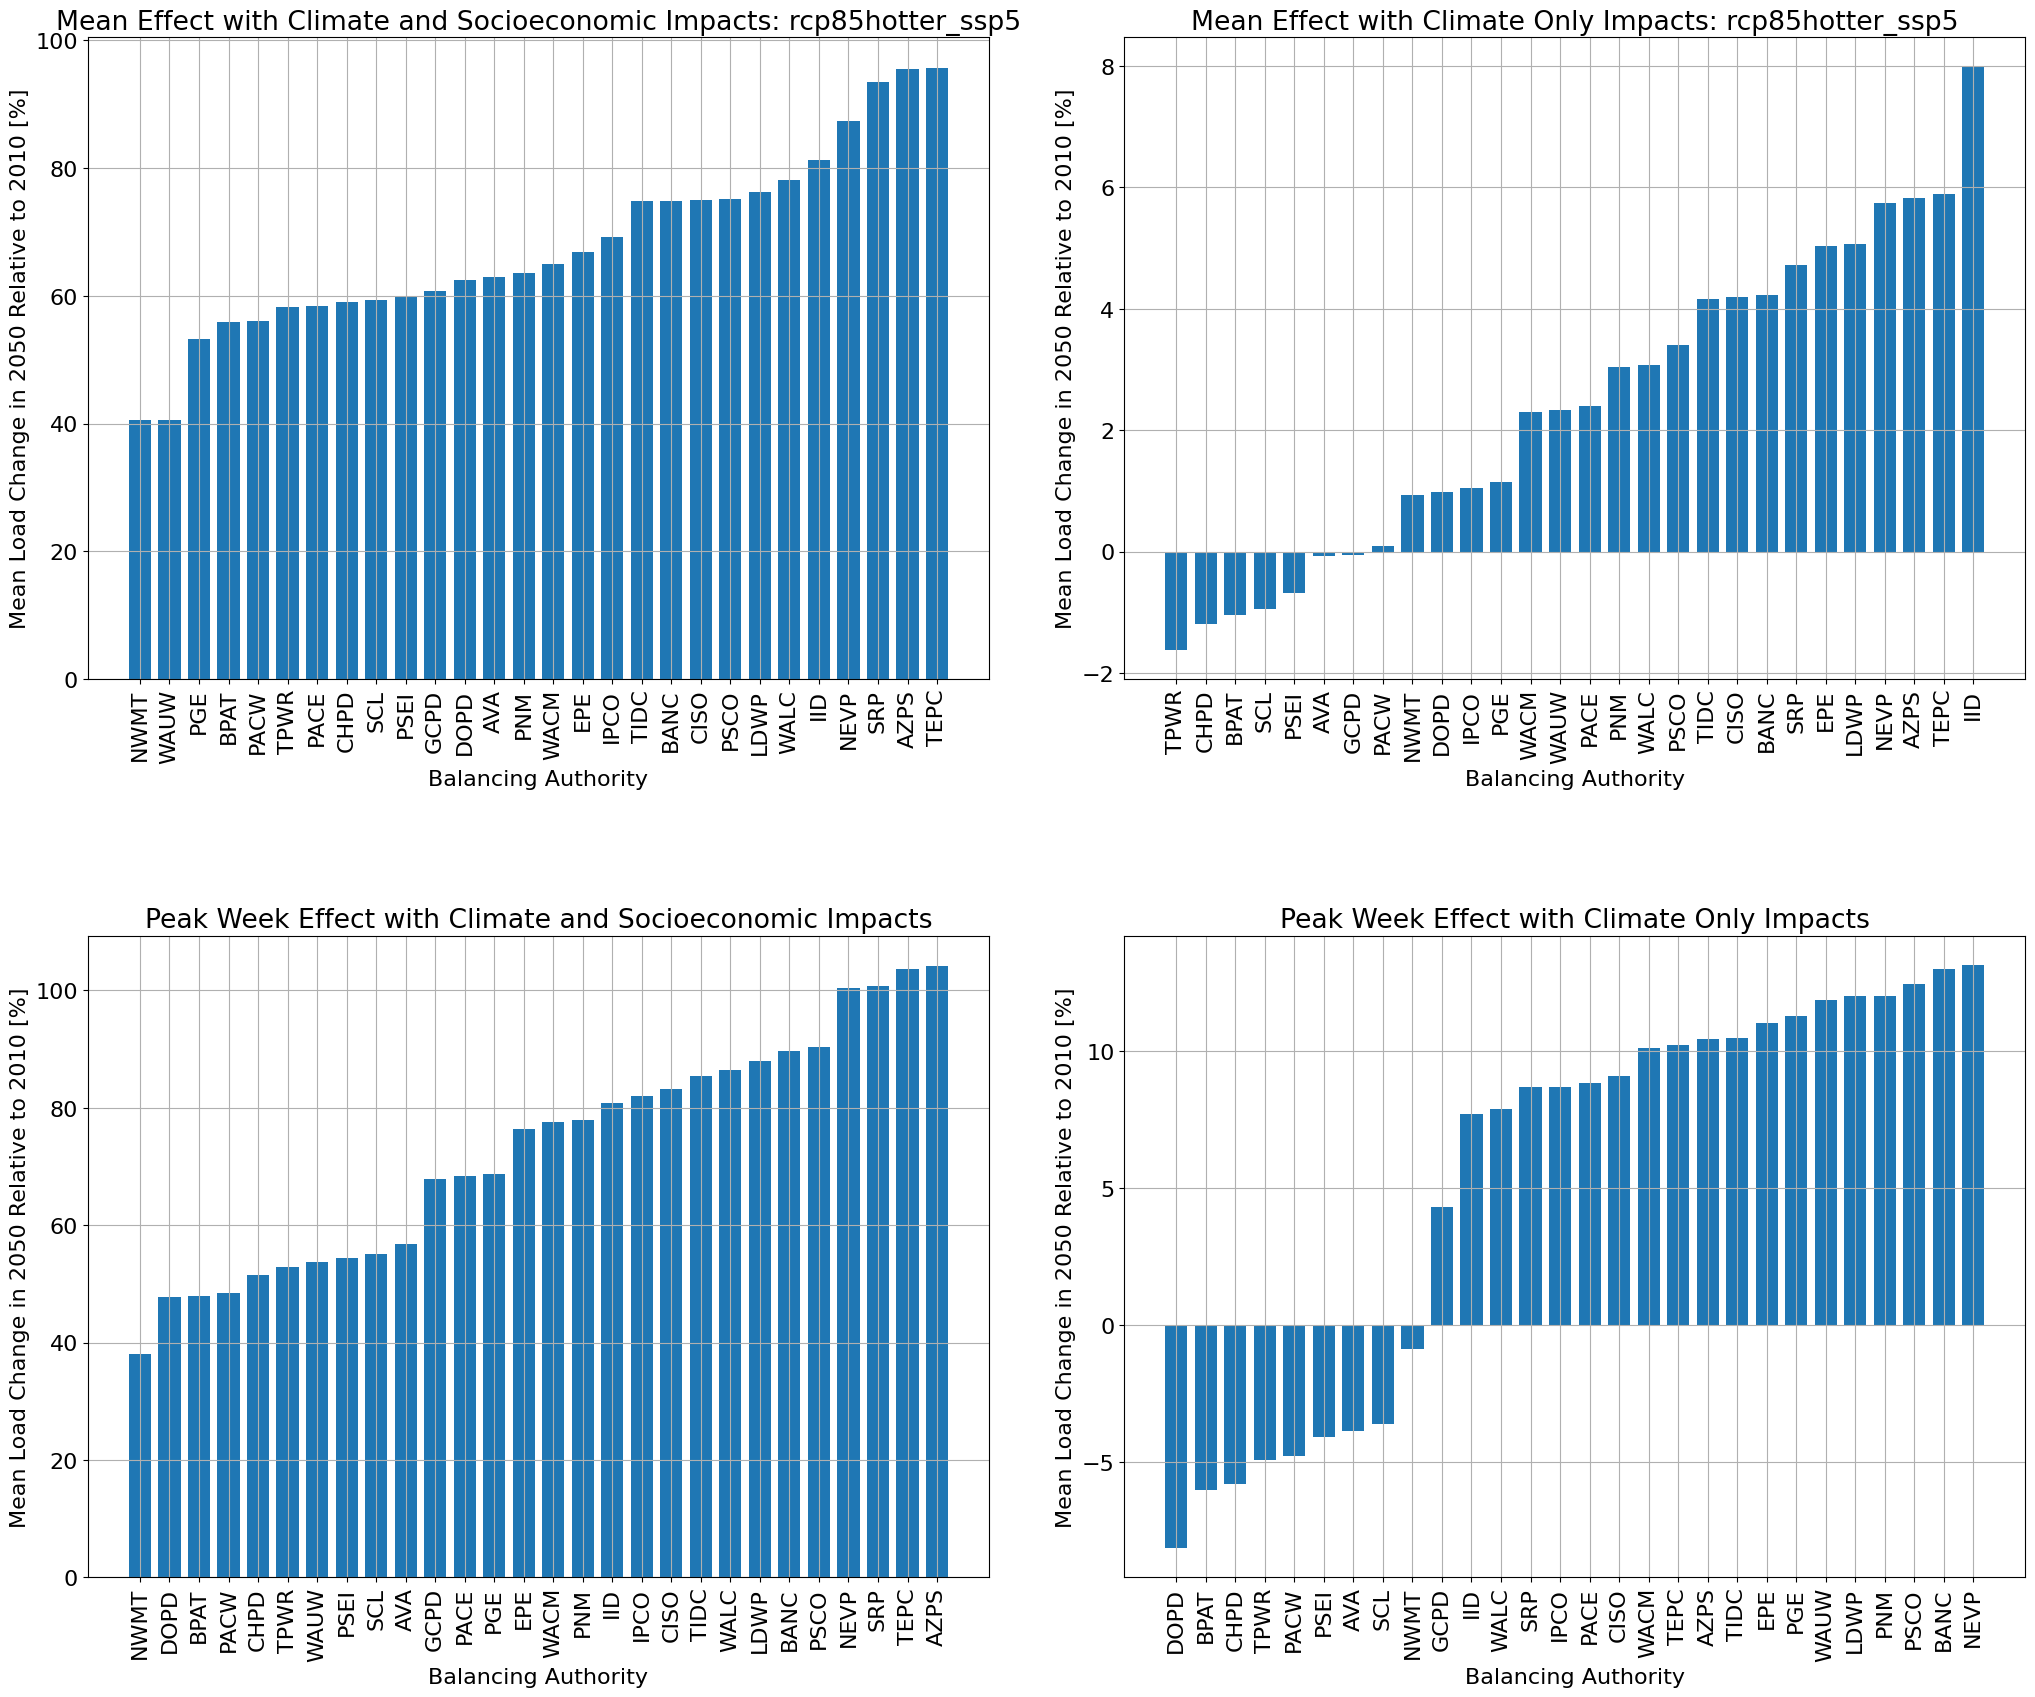

In [71]:
# Create an x-axis the length of the dataframe to be used in plotting:
x_axis = np.arange(len(ba_df))

# Make the plot:
plt.figure(figsize=(25, 20))
plt.subplot(221)
plt.bar(x_axis, ba_df.sort_values(by=['Mean_With_Pop'], ascending=True)['Mean_With_Pop'], 0.75)
plt.xticks(x_axis, ba_df.sort_values(by=['Mean_With_Pop'], ascending=True)['BA'], rotation=90)
plt.grid()
plt.xlabel('Balancing Authority')
plt.ylabel('Mean Load Change in 2050 Relative to 2010 [%]')
plt.title('Mean Effect with Climate and Socioeconomic Impacts: ' + scenario_to_analze)

plt.subplot(222)
plt.bar(x_axis, ba_df.sort_values(by=['Mean_Without_Pop'], ascending=True)['Mean_Without_Pop'], 0.75)
plt.xticks(x_axis, ba_df.sort_values(by=['Mean_Without_Pop'], ascending=True)['BA'], rotation=90)
plt.grid()
plt.xlabel('Balancing Authority')
plt.ylabel('Mean Load Change in 2050 Relative to 2010 [%]')
plt.title('Mean Effect with Climate Only Impacts: ' + scenario_to_analze)

plt.subplot(223)
plt.bar(x_axis, ba_df.sort_values(by=['Peak_With_Pop'], ascending=True)['Peak_With_Pop'], 0.75)
plt.xticks(x_axis, ba_df.sort_values(by=['Peak_With_Pop'], ascending=True)['BA'], rotation=90)
plt.grid()
plt.xlabel('Balancing Authority')
plt.ylabel('Mean Load Change in 2050 Relative to 2010 [%]')
plt.title('Peak Week Effect with Climate and Socioeconomic Impacts')

plt.subplot(224)
plt.bar(x_axis, ba_df.sort_values(by=['Peak_Without_Pop'], ascending=True)['Peak_Without_Pop'], 0.75)
plt.xticks(x_axis, ba_df.sort_values(by=['Peak_Without_Pop'], ascending=True)['BA'], rotation=90)
plt.grid()
plt.xlabel('Balancing Authority')
plt.ylabel('Mean Load Change in 2050 Relative to 2010 [%]')
plt.title('Peak Week Effect with Climate Only Impacts')

plt.subplots_adjust(wspace=0.15, hspace=0.4)

filename = ('BA_Comparison_2050_' + scenario_to_analze + '.png')

plt.savefig(os.path.join(image_output_dir, filename), dpi=300, bbox_inches='tight', facecolor='white')
